<a href="https://colab.research.google.com/github/samratchakraborty422000/Python-Practice/blob/main/Regularization(_Ridge%2C_Lasso%2C_ElasticNet_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Regularization?

- It is one of the most important concepts of machine learning. This technique prevents the model from overfitting by adding extra information to it.

- It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique forces us not to learn a more complex or flexible model, to avoid the problem of overfitting.

Now, let’s understand the “How flexibility of a model is represented?”

- For regression problems, the increase in flexibility of a model is represented by an increase in its coefficients, which are calculated from the regression line.
- In simple words, “In the Regularization technique, we reduce the magnitude of the independent variables by keeping the same number of variables”. It maintains accuracy as well as a generalization of the model.

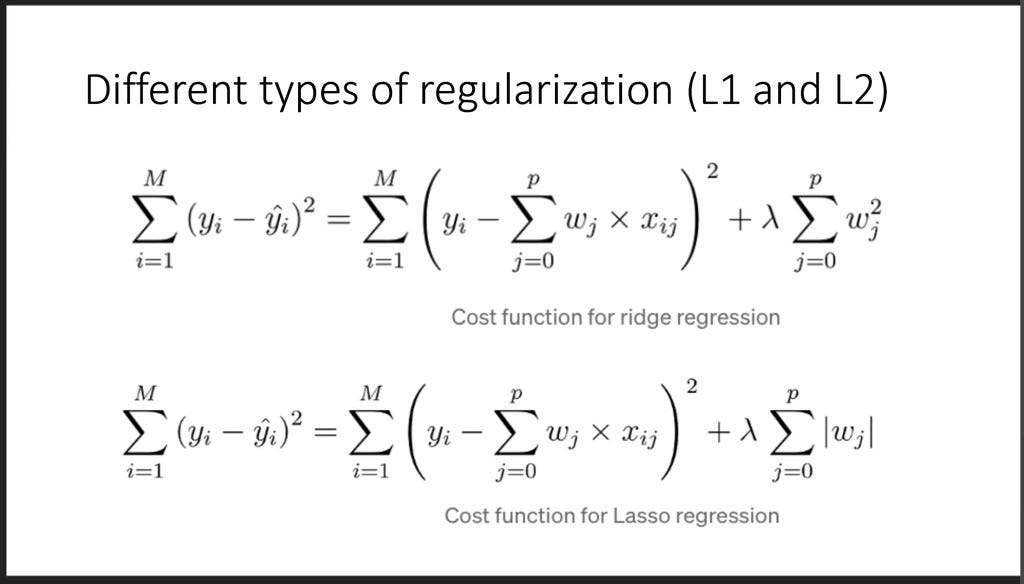

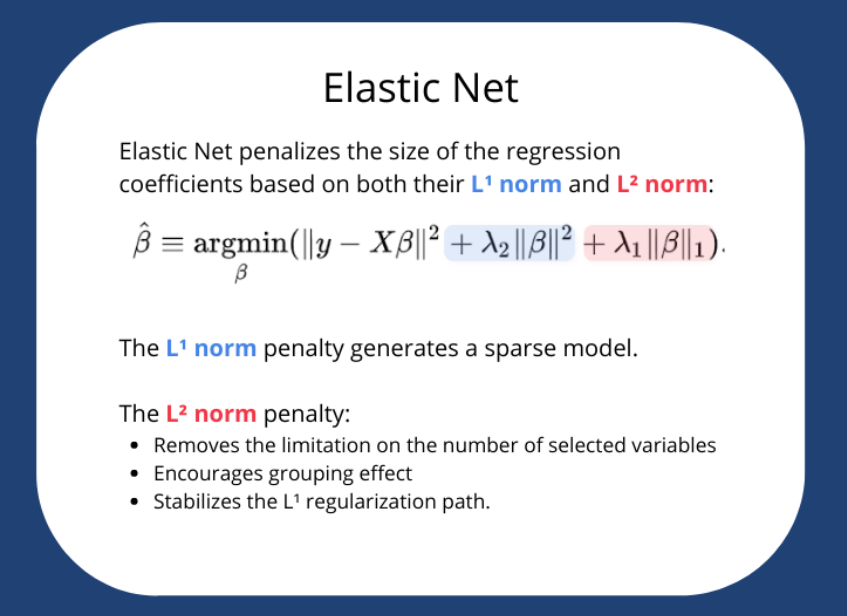

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,RidgeCV,LassoCV,ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [44]:
df= pd.read_csv('Real estate.csv')

In [45]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [46]:
df.shape

(414, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [48]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [49]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

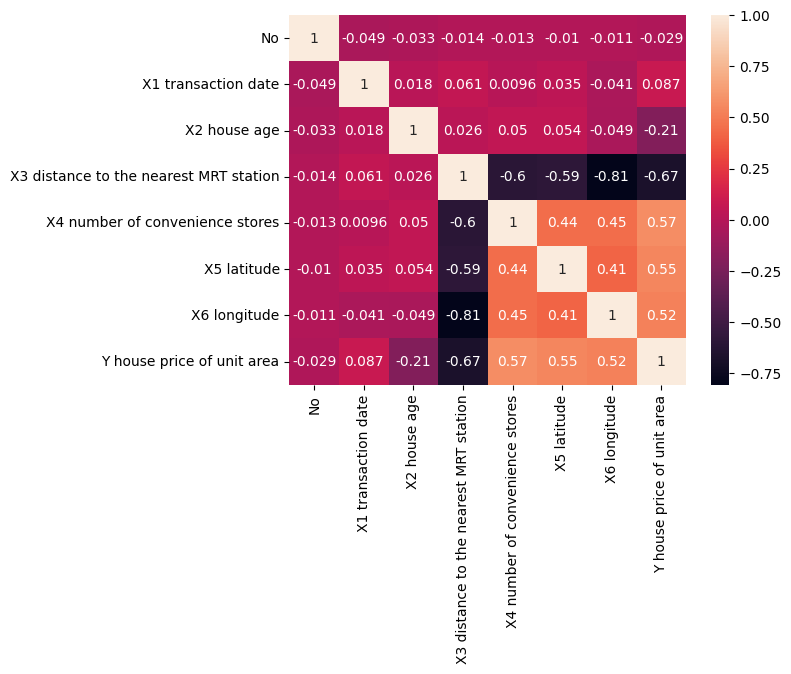

In [50]:
sns.heatmap(df.corr(), annot=True)

## Feature Selection

In [51]:
X=df.iloc[:,:-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [52]:
y=df.iloc[:,-1]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [53]:
# Polynomial convertion to non linear model
polyconverter=PolynomialFeatures(degree=3,include_bias=False)
poly_features=polyconverter.fit_transform(X)
poly_features.shape

(414, 119)

In [54]:
pd.DataFrame(poly_features).head() #looking into the features

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,1.0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,1.0,2012.917,32.0,...,1000.0,2498.29800,12154.02400,6241.492897,30364.373851,147720.299393,15593.109221,75859.254464,369049.328532,1.795396e+06
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951,4.0,4025.834,39.0,...,729.0,2023.40754,9844.70031,5616.156479,27324.884549,132946.672419,15588.166481,75842.767389,369005.897656,1.795364e+06
2,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.54391,9.0,6040.749,39.9,...,125.0,624.68650,3038.59775,3121.865786,15185.367947,73864.610290,15601.499292,75888.754831,369137.799010,1.795559e+06
3,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.54391,16.0,8054.000,53.2,...,125.0,624.68650,3038.59775,3121.865786,15185.367947,73864.610290,15601.499292,75888.754831,369137.799010,1.795559e+06
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245,25.0,10064.165,25.0,...,125.0,624.48425,3038.56125,3119.844628,15180.269146,73862.835760,15586.350661,75838.711941,369009.420740,1.795494e+06


## Data Splitting

In [55]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((289, 119), (125, 119), (289,), (125,))

## Standardization

In [57]:
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [58]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## L2 Regularisation (Ridge Regression)

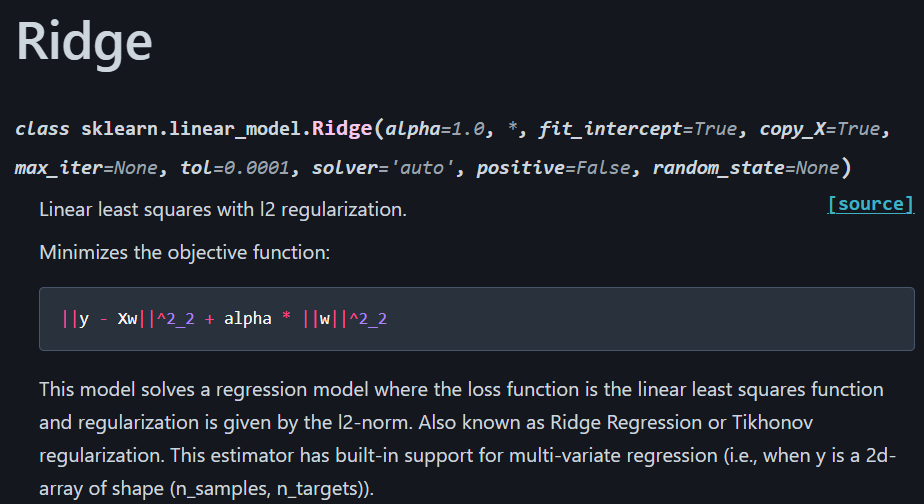

In [59]:
ridge_model=Ridge(alpha=10) #alpha is the learning rate(lambda in formula)

In [60]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [61]:
#predict the test data
y_pred= ridge_model.predict(X_test)

## Model Performance Metrics

In [62]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r_squared=r2_score(y_test, y_pred)
print("The mean absolute error is: ",mae)
print("The mean squared error is: ",mse)
print("The root mean absolute error is: ",rmse)
print("The r squared is: ",r_squared)

The mean absolute error is:  4.276237626163718
The mean squared error is:  30.114324335348684
The root mean absolute error is:  5.4876519874486105
The r squared is:  0.7725097267478704


## Ridge Regression (Choosing an alpha value with Cross-Validation)

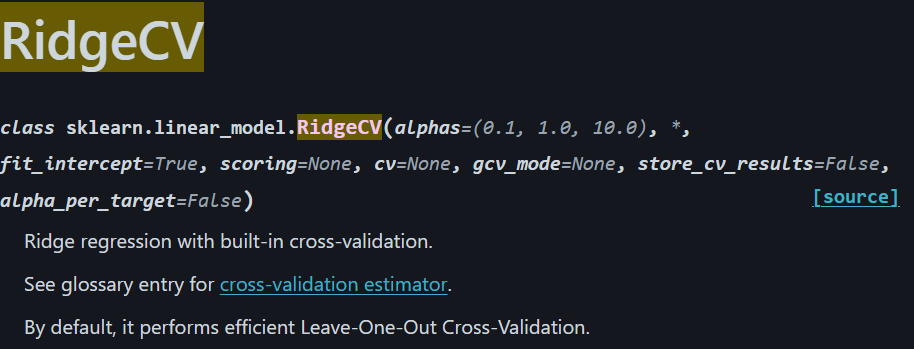

In [63]:
ridge_cv=RidgeCV(alphas=(0.1,1.0,10,40,50),scoring='neg_mean_absolute_error')

Lower MAE means better model performance.Since MAE is a loss (lower is better), scikit-learn negates it to follow the convention

In [64]:
ridge_cv.fit(X_train,y_train)
print("The optimal value of alpha for Ridge Regression is: ", ridge_cv.alpha_)

The optimal value of alpha for Ridge Regression is:  40.0


In [65]:
#Predicting Test Data
y_pred_ridge_cv= ridge_cv.predict(X_test)

In [66]:
mae= mean_absolute_error(y_test, y_pred_ridge_cv)
mse= mean_squared_error(y_test, y_pred_ridge_cv)
rmse= np.sqrt(mse)
r_squared=r2_score(y_test, y_pred_ridge_cv)
print("The mean absolute error is: ",mae)
print("The mean squared error is: ",mse)
print("The root mean absolute error is: ",rmse)
print("The r squared is: ",r_squared)

The mean absolute error is:  4.401597593471828
The mean squared error is:  30.045691462434775
The root mean absolute error is:  5.481395028862158
The r squared is:  0.7730281946649785


In [67]:
ridge_cv.coef_

array([-0.08954747,  0.29407366, -0.86128985, -0.66869533,  0.43668178,
        0.41013732, -0.2394642 ,  0.09028514, -0.08920558, -0.18305061,
       -0.11901168, -0.05912582, -0.09051963, -0.08987896,  0.29420838,
       -0.8609402 , -0.66893446,  0.43680672,  0.46799331,  0.060137  ,
        0.62298851,  0.00818443, -0.0793415 , -0.86182937, -0.86139762,
        0.37851952, -0.67803583, -0.67399439, -0.66925188, -0.03725236,
        0.43687454,  0.43695632,  0.40987201,  0.3093761 , -0.23951179,
        0.12828143,  0.09057458,  0.35708508,  0.17748007, -0.19567644,
        0.08854054,  0.0899706 , -0.08886364, -0.18277507, -0.11914955,
       -0.05874448, -0.09017786, -0.08953703,  1.16951631,  0.03019736,
        0.88440625, -0.18417321, -0.18311582,  0.7355986 , -0.41633885,
       -0.12201729, -0.11944723,  0.05969618, -0.06039246, -0.0590441 ,
       -0.09149074, -0.09085043, -0.09021049,  0.2943431 , -0.86059047,
       -0.66917351,  0.43693172,  0.49026007,  0.16904168,  0.62

In [68]:
count = 0
for i in ridge_cv.coef_:
    if i!=0:
        count+=1
print("After Lasso Regression, we have", count , " none-zero coefficients.")

After Lasso Regression, we have 119  none-zero coefficients.


## L1 Regularisation (Lasso Regression)

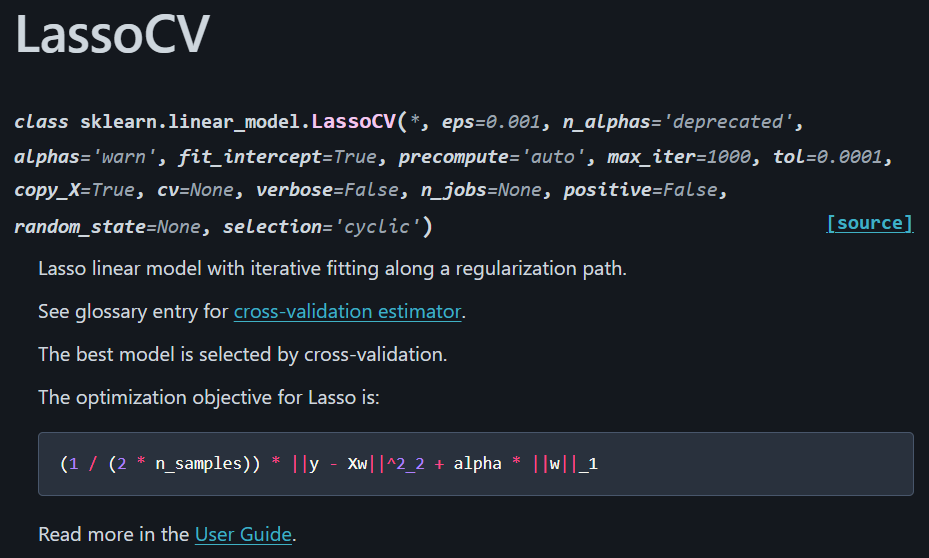

In [69]:
lasso_cv= LassoCV(cv=5)

In [70]:
lasso_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.917155017101322, tolerance: 4.725323558441558
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7554260790093394, tolerance: 4.725323558441558
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.144674173468957, tolerance: 4.725323558441558
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWa

LassoCV(cv=5)

In [71]:
print("The optimal value of alpha for Lasso Regression is: ",lasso_cv.alpha_)

The optimal value of alpha for Lasso Regression is:  0.16530694867250684


In [72]:
y_pred_lasso_cv= lasso_cv.predict(X_test)
mae= mean_absolute_error(y_test, y_pred_lasso_cv)
mse= mean_squared_error(y_test, y_pred_lasso_cv)
rmse= np.sqrt(mse)
r_squared=r2_score(y_test,y_pred_lasso_cv)
print("The mean absolute error is: ",mae)
print("The mean squared error is: ",mse)
print("The root mean absolute error is: ",rmse)
print("The r squared is: ",r_squared)

The mean absolute error is:  4.415533944334098
The mean squared error is:  30.233303495810677
The root mean absolute error is:  5.4984819264784965
The r squared is:  0.7716109318281041


In [73]:
lasso_coefs=np.array(lasso_cv.coef_)
lasso_coefs

array([-0.        ,  0.        , -3.11679834, -2.94315497,  3.50543537,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.10184233, -0.        ,  0.        ,
       -0.19285449, -1.05771711,  0.17583425,  1.97557697,  0.        ,
        0.        , -0.        ,  0.        , -0.058762  , -0.01944057,
        0.        , -1.52814126, -0.77683662, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.51546395,  0.        ,
        0.51706151, -0.        , -0.        ,  0.34941812, -0.67790559,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.09645724, -0.        , -0.        ,  0.        , -0.02055301,
       -0.        ,  0.        ,  1.98228419,  0.        ,  0.  

In [74]:
count = 0
for i in lasso_coefs:
    if i!=0:
        count+=1
print("After Lasso Regression, we have", count , " none-zero coefficients.")

After Lasso Regression, we have 32  none-zero coefficients.


In Lasso Regression, the alpha parameter controls regularization strength, and it has a special property:

Lasso can shrink some coefficients exactly to zero.

**L1 penalty encourages sparsity**

i.e., some coefficients are set exactly to 0.

## Elastic Net

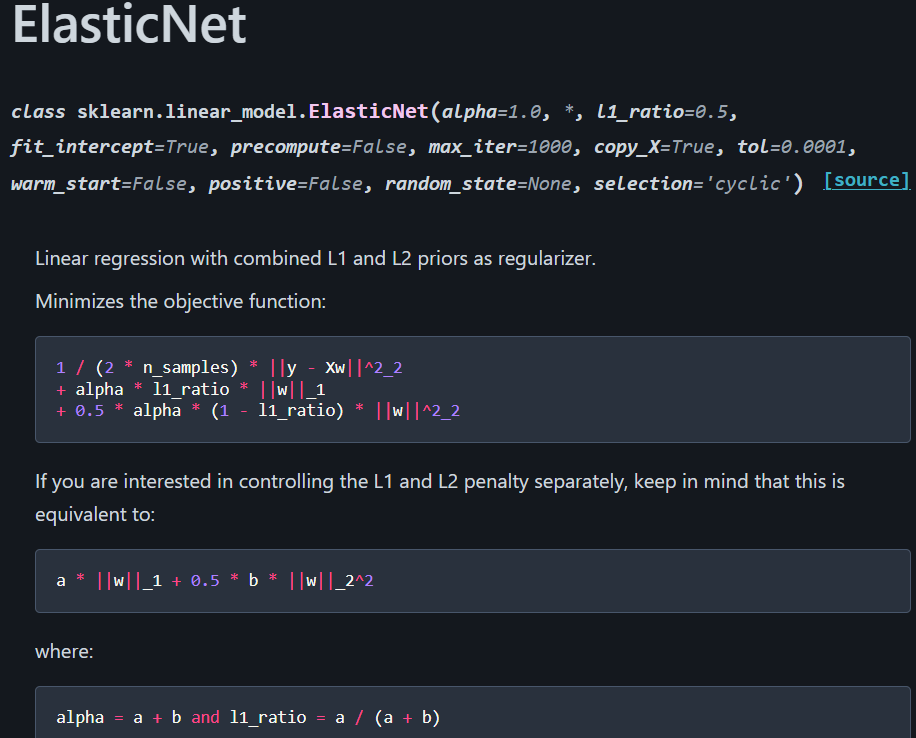

In [75]:
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)

In [76]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000)

In [77]:
y_pred_elastic=elastic_model.predict(X_test)

In [78]:
y_elastic_model_pred= elastic_model.predict(X_test)
mae= mean_absolute_error(y_test,y_elastic_model_pred)
mse= mean_squared_error(y_test, y_elastic_model_pred)
rmse= np.sqrt(mse)
r_squared=r2_score(y_test,y_elastic_model_pred)
print("The mean absolute error is: ",mae)
print("The mean squared error is: ",mse)
print("The root mean absolute error is: ",rmse)
print("The r squared is: ",r_squared)

The mean absolute error is:  4.431659265435472
The mean squared error is:  30.467019804061515
The root mean absolute error is:  5.519693814339842
The r squared is:  0.7698453870914735


In [79]:
elastic_coefs=np.array(elastic_model.coef_)
elastic_coefs

array([-1.04984580e-02,  0.00000000e+00, -7.58259922e-01, -4.99653633e-01,
        4.07436910e-01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.22586021e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.37885612e-02, -2.17777678e-02,  0.00000000e+00, -7.53909610e-01,
       -5.36893971e-01,  4.34793566e-01,  1.41940450e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -7.65360708e-01,
       -7.68574418e-01,  0.00000000e+00, -3.95819662e-01, -6.36195825e-01,
       -5.59987607e-01,  0.00000000e+00,  4.21377083e-01,  4.06158479e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.91343195e-03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.81003482e-02, -1.47185138e-02,
        6.98752696e-01,  0.00000000e+00,  3.10401901e-01, -0.00000000e+00,
       -0.00000000e+00,  

In [80]:
count = 0
for i in elastic_coefs:
    if i!=0:
        count+=1
print("After Elastic Net, we have", count , " none-zero coefficients.")

After Elastic Net, we have 56  none-zero coefficients.
